## Preprocesamiento

Cargar librerías

In [142]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Lectura de datos

In [143]:
df= pd.read_csv('./df.csv')

In [144]:
df

,outcome,age,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,EF
0,0.0,72,1,0,0,0,1,1,0,1,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,21.166667,55
1,0.0,75,2,0,0,0,0,1,0,0,...,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,33.444444,55
2,0.0,83,2,0,0,0,0,1,0,0,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,30.571429,35
3,0.0,43,2,0,0,0,0,0,0,0,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,38.571429,55
4,0.0,75,2,1,0,0,0,1,0,0,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,22.000000,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.0,62,1,1,1,0,1,0,1,1,...,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,27.714286,40
1172,0.0,78,1,0,1,0,1,0,1,1,...,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,20.480000,30
1173,0.0,85,2,1,1,0,1,1,0,0,...,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,28.857143,55
1174,0.0,79,2,0,0,1,1,1,1,1,...,35.500000,135.166667,4.091667,140.000000,8.183333,104.000000,15.750000,2.090000,24.375000,25


In [145]:
df.columns

Index(['outcome', 'age', 'gendera', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'PT', 'INR', 'NT-proBNP', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'Bicarbonate', 'EF'],
      dtype='object')

Escalar variables numéricas

In [146]:
Scaler = MinMaxScaler()

In [147]:
#Crear lista con las variables que deben escalarse
lista = ['age', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure','Respiratory rate', 'temperature', 'SP O2','Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'PT', 'INR', 'NT-proBNP', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'Bicarbonate', 'EF']

for x in lista:
    df[[x]]=Scaler.fit_transform(df[[x]])

In [148]:
#Reemplazar de la variable gendera el 2 por 0, así quedaría: Mujer 0 y Hombre 1 
df.gendera=df.gendera.replace(2,0)

In [149]:
df['outcome']=df['outcome'].astype(int)

Selección de variables

In [150]:
target = ['outcome']
X = df.iloc[:,~df.columns.isin(target)].values
y = df.outcome

In [151]:
df1=df.iloc[:,~df.columns.isin(target)]

In [152]:
df1

,age,gendera,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,Bicarbonate,EF
0,0.6625,1,0,0,0,1,1,0,1,1,...,0.285453,0.138069,0.509346,0.601029,0.179679,0.683867,0.346185,0.455782,0.238714,0.666667
1,0.7000,0,0,0,0,0,1,0,0,0,...,0.095760,0.232659,0.406542,0.604495,0.344118,0.430145,0.254886,0.182398,0.591427,0.666667
2,0.8000,0,0,0,0,0,1,0,0,1,...,0.182233,0.236976,0.792056,0.650050,0.368627,0.605553,0.178313,0.283285,0.508892,0.333333
3,0.3000,0,0,0,0,0,0,0,0,0,...,0.063485,0.177252,0.388785,0.594790,0.653394,0.279339,0.303270,0.203110,0.738714,0.666667
4,0.7000,0,1,0,0,0,1,0,0,1,...,0.240694,0.227622,0.500000,0.549037,0.478431,0.573439,0.452209,0.093537,0.262654,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.5375,1,1,1,0,1,0,1,1,1,...,0.272665,0.153507,0.716956,0.550225,0.840336,0.335116,0.716007,0.491740,0.426813,0.416667
1172,0.7375,1,0,1,0,1,0,1,1,1,...,0.186344,0.206275,0.426168,0.524413,0.899654,0.507655,0.610892,0.229167,0.218988,0.250000
1173,0.8250,0,1,1,0,1,1,0,0,1,...,0.160311,0.093063,0.308411,0.532399,0.415686,0.402726,0.390361,0.235180,0.459644,0.666667
1174,0.7500,0,0,0,1,1,1,1,1,1,...,0.192738,0.197160,0.306075,0.632224,0.349020,0.561607,0.483133,0.258163,0.330882,0.166667


*Kbest*

In [161]:
#crear un modelo de selección
est_prueba = SelectKBest(score_func=f_classif, k=15)
est_ajustado = est_prueba.fit(X, y)

#Muestro el desempeño de los features basado en el valor F
set_printoptions(precision=10)
print(est_ajustado.scores_)
features = est_ajustado.transform(X)
print(features)

[ 4.906117423   0.604722893   6.1933167322 12.09341954    0.2535396379
  2.9420473743 11.7421499927  4.3679694309  3.3655781091 13.985366765
  2.635122808  19.9616077221 20.9375873928  8.9709432457 16.1840878199
 10.132170376   5.9385433789 35.5095457336  0.3209817655  0.676186217
  0.2104279789  1.1947875702  1.3702451112 26.3235209611 53.234894381
  9.2603441032 23.3810302323 24.8123588389 17.465943934   2.5678109324
 50.471079883   1.2205460301 22.4361881907  5.1936916545 41.1670876312
  4.2181681671 65.3784938905  6.4700675244 61.2344618796  0.6844358012]
[[1.           0.3293389504 0.6317708336 ... 0.1796791445 0.3461847391
  0.2387140903]
 [0.           0.6556159173 0.5078125    ... 0.3441176471 0.2548862113
  0.5914272684]
 [1.           0.3642441972 0.4713541664 ... 0.3686274511 0.178313253
  0.5088919287]
 ...
 [1.           0.1676890932 0.4905598961 ... 0.4156862746 0.3903614458
  0.4596443228]
 [1.           0.5756790641 0.1516927084 ... 0.3490196078 0.4831325301
  0.3308823

In [162]:
dicscore = {df1.columns[i]:est_ajustado.scores_[i] for i in range(len(df1.columns[:]))
  
}
sorted(dicscore.items(), key=lambda x:x[1], reverse=True)

[('Anion gap', 65.37849389046838),
 ('Bicarbonate', 61.23446187956848),
 ('Leucocyte', 53.23489438101023),
 ('Urea nitrogen', 50.471079882999675),
 ('Blood calcium', 41.16708763118437),
 ('Urine output', 35.50954573359724),
 ('RDW', 26.323520961124316),
 ('INR', 24.812358838938113),
 ('PT', 23.381030232327998),
 ('Blood potassium', 22.436188190672304),
 ('Systolic blood pressure', 20.937587392769558),
 ('heart rate', 19.961607722082015),
 ('NT-proBNP', 17.46594393403013),
 ('Respiratory rate', 16.184087819886678),
 ('Renal failure', 13.985366765048116),
 ('atrialfibrillation', 12.093419539981538),
 ('deficiencyanemias', 11.742149992721616),
 ('temperature', 10.1321703760395),
 ('Platelets', 9.260344103179236),
 ('Diastolic blood pressure', 8.970943245689286),
 ('Magnesium ion', 6.470067524414865),
 ('hypertensive', 6.193316732227779),
 ('SP O2', 5.9385433789245825),
 ('Blood sodium', 5.193691654515833),
 ('age', 4.906117422996991),
 ('depression', 4.367969430850716),
 ('Chloride', 4.21

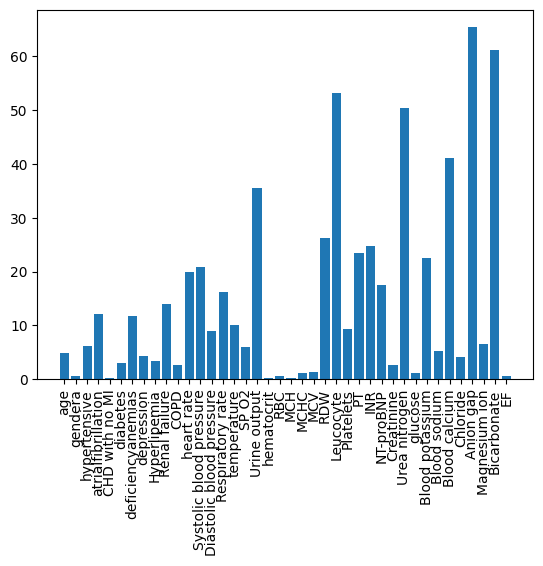

In [163]:
#Se procede a realizar una grafica para visualizar el numero de features a seleccionar 
pesos = dicscore.values()
valores = range(len(pesos))
plt.bar(x=valores,height=pesos)
plt.xticks(valores, dicscore.keys(), rotation = 90)
plt.show()

In [159]:
df.columns

Index(['outcome', 'age', 'gendera', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'PT', 'INR', 'NT-proBNP', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'Bicarbonate', 'EF'],
      dtype='object')

*Recursive Feature Elimination*

In [164]:
modelo = LogisticRegression(solver='liblinear')
est_rfe = RFE(modelo, n_features_to_select=15)
est_ajustado = est_rfe.fit(X,y)

print(est_ajustado.n_features_)
print(est_ajustado.support_)
print(est_ajustado.ranking_)

15
[False False False False False False False False False  True False  True
 False  True False  True  True  True False False False False False  True
  True  True False  True False False  True False  True False  True False
  True False  True False]
[ 8 22 20 17 26 19  7 13 15  1  6  1 12  1  2  1  1  1 25 14 21  5  4  1
  1  1 10  1 11  9  1 16  1 18  1 24  1  3  1 23]


In [165]:
dicscore1 = [df1.columns[i] for i in range(len(df1.columns[:])) if est_ajustado.support_[i]==True]
dicscore1
#Los features seleccionados por el metodo Recursive Feature Elimination son:

['Renal failure',
 'heart rate',
 'Diastolic blood pressure',
 'temperature',
 'SP O2',
 'Urine output',
 'RDW',
 'Leucocyte',
 'Platelets',
 'INR',
 'Urea nitrogen',
 'Blood potassium',
 'Blood calcium',
 'Anion gap',
 'Bicarbonate']

Tras comparar los dos métodos, las variables seleccionadas son las siguientes:

- Anion gap
- Bicarbonate
- Leucocyte
- Urea nitrogen
- Blood calcium
- Urine output
- RDW
- INR
- Blood potassium
- heart rate
- Renal failure










df con los features seleccionados

In [166]:
df1 = df[['Anion gap',
 'Bicarbonate',
 'Leucocyte', 'Urea nitrogen',
 'Blood calcium',
 'Urine output',
 'RDW','INR','Blood potassium', 'heart rate', 'Renal failure', 'outcome']]

Guardar df1

In [168]:
df1.to_csv('./df1.csv', index=False)

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Anion gap        1176 non-null   float64
 1   Bicarbonate      1176 non-null   float64
 2   Leucocyte        1176 non-null   float64
 3   Urea nitrogen    1176 non-null   float64
 4   Blood calcium    1176 non-null   float64
 5   Urine output     1176 non-null   float64
 6   RDW              1176 non-null   float64
 7   INR              1176 non-null   float64
 8   Blood potassium  1176 non-null   float64
 9   heart rate       1176 non-null   float64
 10  Renal failure    1176 non-null   int64  
 11  outcome          1176 non-null   int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 105.8 KB
